# Sheet

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
# read data
path_to_datafile = "Concrete_Data.xls"
df = pd.read_excel(path_to_datafile)
# df["ds"] = pd.to_datetime(df["ds"])
# df.set_index("ds", inplace=True)
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "component1",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "component2",
                   "Fly Ash (component 3)(kg in a m^3 mixture)": "component3",
                   "Water  (component 4)(kg in a m^3 mixture)": "component4",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)": "component5",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "component6",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)": "component7",
                   "Age (day)": "age",
                   "Concrete compressive strength(MPa, megapascals) ": "y", }, inplace=True)

print(df.head())

   component1  component2  component3  component4  component5  component6  \
0       540.0         0.0         0.0       162.0         2.5      1040.0   
1       540.0         0.0         0.0       162.0         2.5      1055.0   
2       332.5       142.5         0.0       228.0         0.0       932.0   
3       332.5       142.5         0.0       228.0         0.0       932.0   
4       198.6       132.4         0.0       192.0         0.0       978.4   

   component7  age          y  
0       676.0   28  79.986111  
1       676.0   28  61.887366  
2       594.0  270  40.269535  
3       594.0  365  41.052780  
4       825.5  360  44.296075  


In [124]:
# normalization
df_norm = df.copy(deep=True)
df_norm["component1"] = [(x - min(df_norm["component1"])) / (max(df_norm["component1"]) - min(df_norm["component1"]))
                         for x in df_norm["component1"]]
df_norm["component2"] = [(x - min(df_norm["component2"])) / (max(df_norm["component2"]) - min(df_norm["component2"]))
                         for x in df_norm["component2"]]

df_norm["component3"] = [(x - min(df_norm["component3"])) / (max(df_norm["component3"]) - min(df_norm["component3"]))
                         for x in df_norm["component3"]]

df_norm["component4"] = [(x - min(df_norm["component4"])) / (max(df_norm["component4"]) - min(df_norm["component4"]))
                         for x in df_norm["component4"]]

df_norm["component5"] = [(x - min(df_norm["component5"])) / (max(df_norm["component5"]) - min(df_norm["component5"]))
                         for x in df_norm["component5"]]

df_norm["component6"] = [(x - min(df_norm["component6"])) / (max(df_norm["component6"]) - min(df_norm["component6"]))
                         for x in df_norm["component6"]]

df_norm["component7"] = [(x - min(df_norm["component7"])) / (max(df_norm["component7"]) - min(df_norm["component7"]))
                         for x in df_norm["component7"]]

df_norm["age"] = [(x - min(df_norm["age"])) / (max(df_norm["age"]) - min(df_norm["age"]))
                  for x in df_norm["age"]]

df_norm["y"] = [(x - min(df_norm["y"])) / (max(df_norm["y"]) - min(df_norm["y"]))
                  for x in df_norm["y"]]




In [136]:
del df_norm['y']
del df_norm['y_lasso']
del df_norm['component6']
del df_norm['component7']
# df_norm_full = df_norm.copy(deep=False)
# del df_norm['component6']
# del df_norm['component7']

# del df_norm_full['y_lasso']
# del df_norm_full['y']
df_norm.head()
# df_norm_full.head()
# print('covariance matrix')
# pd.set_option('display.max_columns', None)
# a = df_norm.cov()
# print(a)
# print(np.linalg.cond(a))

,component1,component2,component3,component4,component5,age
0,1.000000,0.000000,0.0,0.321357,0.07764,0.074176
1,1.000000,0.000000,0.0,0.321357,0.07764,0.074176
2,0.526256,0.396494,0.0,0.848303,0.00000,0.739011
3,0.526256,0.396494,0.0,0.848303,0.00000,1.000000
4,0.220548,0.368392,0.0,0.560878,0.00000,0.986264


In [35]:
from sklearn.feature_selection import mutual_info_regression
# y = df_norm['y']
# del df_norm['y']
# for i in range(7):
mutual_info = mutual_info_regression(df_norm, df_norm['component7'])
mutual_info /= np.max(mutual_info)
print(mutual_info)
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = df_norm.columns
# mutual_info.sort_values(ascending=False)
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))




# 1 with (4), 6, 7
# 2 with 1, (4), 6,7
#3 with 1, 5, 6, 7
#4 with 1, 6, 7

[0.67858947 0.41252224 0.35066334 0.59802786 0.46751505 0.70072297
 1.         0.03561641]


In [117]:
# y = df_norm['y']
# del df_norm['y']
# df_norm.head()
y

In [95]:
del df_norm['y']
# del df_norm['component3']
# del df_norm['component6']
# del df_norm['component7']

df_norm.head()

,component1,component2,component3,component4,component5,age
0,1.000000,0.000000,0.0,0.321357,0.07764,0.074176
1,1.000000,0.000000,0.0,0.321357,0.07764,0.074176
2,0.526256,0.396494,0.0,0.848303,0.00000,0.739011
3,0.526256,0.396494,0.0,0.848303,0.00000,1.000000
4,0.220548,0.368392,0.0,0.560878,0.00000,0.986264


In [39]:
# print('covariance matrix')
# pd.set_option('display.max_columns', None)
a = df_norm.cov()
print(a)
print(np.linalg.cond(a))

            component1  component2  component3  component4  component5  \
component1    0.056930   -0.015763   -0.030331   -0.003317    0.004106   
component2   -0.015763    0.057631   -0.024843    0.004391    0.001932   
component3   -0.030331   -0.024843    0.102286   -0.014017    0.022388   
component4   -0.003317    0.004391   -0.014017    0.029071   -0.020796   
component5    0.004106    0.001932    0.022388   -0.020796    0.034415   
age           0.003393   -0.001843   -0.008568    0.008214   -0.006204   

                 age  
component1  0.003393  
component2 -0.001843  
component3 -0.008568  
component4  0.008214  
component5 -0.006204  
age         0.030117  
16.472469155197548


In [64]:
# ols regression

# y = df_norm['y']
# del df_norm['y']

reg = LinearRegression().fit(df_norm, y)
reg.score(df_norm, y) #0.584210959834182
ols_coef = reg.coef_
ols_coef


In [96]:
def compare(coef, y):
    y_pred = []
    for i in range(1030):
        y_pred.append(coef[0] * df_norm['component1'][i] + coef[1] * df_norm['component2'][i] +
                      coef[2] * df_norm['component3'][i] + coef[3] * df_norm['component4'][i] + 
                      coef[4] *df_norm['component5'][i] + coef[5] * df_norm['age'][i])
    return y_pred

In [72]:
y

0.18089892353345627 0.18827067194730723 0.15890164292587483


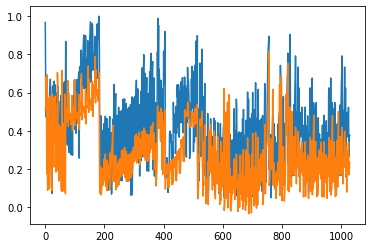

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_ols = compare(ols_coef, y)

plt.plot(np.arange(1030), y)
plt.plot(np.arange(1030), y_ols)
# plt.title('стационарный временной ряд АР(2)')
plt.show()

print(r2_score(y, y_ols), mean_squared_error(y, y_ols, squared=False),
      mean_absolute_error(y, y_ols))

df['y_ols'] = y_ols
df['y_ols']

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y, y_pred, squared=False)
mean_absolute_error(y, y_pred)

0.1834664583005531

In [147]:
# from sklearn.linear_model import ridge_regression

# ridge_coef = ridge_regression(df_norm, y, 0.001)
# coef = pd.DataFrame(ridge_coef)
# # reg.coef #0.584210959834182
# coef

from sklearn.linear_model import Ridge
        
clf = Ridge(alpha=1)
clf.fit(df_norm, y)
ridge_coef = clf.coef_
ridge_coef


0.14488232428433923 0.19236535844716493 0.1619653104870846


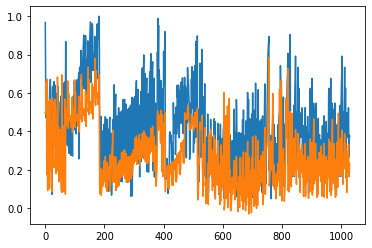

In [149]:
y_ridge = compare(ridge_coef, y)

plt.plot(np.arange(1030), y)
plt.plot(np.arange(1030), y_ridge)
# plt.title('стационарный временной ряд АР(2)')
plt.show()

print(r2_score(y, y_ridge), mean_squared_error(y, y_ridge, squared=False),
      mean_absolute_error(y, y_ridge))

df['y_ridge'] = y_ridge
df['y_ridge']

In [105]:
from sklearn.linear_model import Lasso

# ridge_coef = ridge_regression(df_norm, y, 0.001)
# coef = pd.DataFrame(ridge_coef)
# # reg.coef #0.584210959834182
# coef

clf = Lasso(alpha=0.0001)  # 0.01 - (2) = 0
clf.fit(df_norm, y)
# Lasso(alpha=0.1)
lasso_coef = clf.coef_
lasso_coef

0.1682847918754784 0.18971481456179445 0.16009937525326673


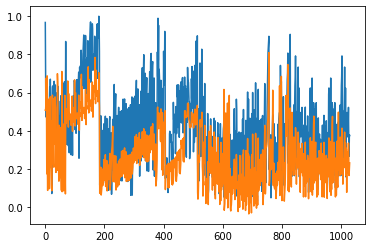

In [106]:
y_lasso = compare(lasso_coef, y)

plt.plot(np.arange(1030), y)
plt.plot(np.arange(1030), y_lasso)
# plt.title('стационарный временной ряд АР(2)')
plt.show()

print(r2_score(y, y_lasso), mean_squared_error(y, y_lasso, squared=False),
      mean_absolute_error(y, y_lasso))

df['y_lasso'] = y_lasso
df['y_lasso']

In [132]:
from sklearn.linear_model import Lasso

# ridge_coef = ridge_regression(df_norm, y, 0.001)
# coef = pd.DataFrame(ridge_coef)
# # reg.coef #0.584210959834182
# coef

clf = Lasso(alpha=0.01)  # 0.01 - (2) = 0
clf.fit(df_norm_full, y)
# Lasso(alpha=0.1)
lasso_coef = clf.coef_
lasso_coef

In [123]:
# y_lasso_full = []
# for i in range(1030):
#     y_lasso_full.append()
df_norm_full

,component1,component2,component3,component4,component5,age,y_lasso
0,1.000000,0.000000,0.000000,0.321357,0.077640,0.074176,0.507742
1,1.000000,0.000000,0.000000,0.321357,0.077640,0.074176,0.507742
2,0.526256,0.396494,0.000000,0.848303,0.000000,0.739011,0.543412
3,0.526256,0.396494,0.000000,0.848303,0.000000,1.000000,0.676400
4,0.220548,0.368392,0.000000,0.560878,0.000000,0.986264,0.580786
...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461876,0.276398,0.074176,0.335770
1026,0.502740,0.000000,0.577711,0.592814,0.322981,0.074176,0.254061
1027,0.106164,0.387869,0.542729,0.566467,0.189441,0.074176,0.165757
1028,0.130365,0.519477,0.000000,0.429940,0.350932,0.074176,0.200934


-1.6102693693555707 0.3360907716670242 0.2875813036474202


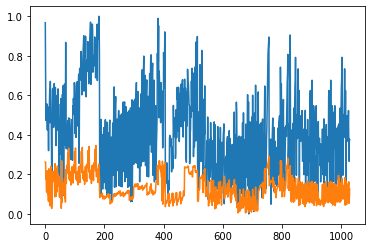

In [133]:
y_lasso_full = []
coef = lasso_coef
for i in range(1030):
    y_lasso_full.append(coef[0] * df_norm['component1'][i] + coef[1] * df_norm['component2'][i] +
                  coef[2] * df_norm['component3'][i] + coef[3] * df_norm['component4'][i] +
                  coef[4] * df_norm['component5'][i] + coef[5] * df_norm['component6'][i] + coef[6] * df_norm['component7'][i]
    +coef[7] * df_norm['age'][i])

plt.plot(np.arange(1030), y)
plt.plot(np.arange(1030), y_lasso_full)
# plt.title('стационарный временной ряд АР(2)')
plt.show()

print(r2_score(y, y_lasso_full), mean_squared_error(y, y_lasso_full, squared=False),
      mean_absolute_error(y, y_lasso_full))

df['y_lasso_full'] = y_lasso_full
df['y_lasso_full']

In [165]:
from sklearn.linear_model import ElasticNet

# ridge_coef = ridge_regression(df_norm, y, 0.001)
# coef = pd.DataFrame(ridge_coef)
# # reg.coef #0.584210959834182
# coef

clf = ElasticNet(alpha=0.00001)  # 0.01 - (2) = 0
clf.fit(df_norm, y)
# Lasso(alpha=0.1)
elastic_coef = clf.coef_
elastic_coef

0.1801116965342845 0.18836112242185102 0.15897492478973554


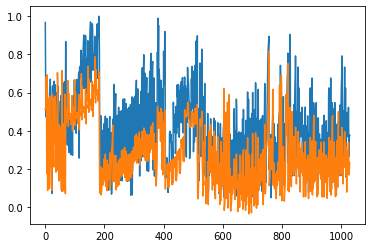

In [166]:
y_elastic = compare(elastic_coef, y)

plt.plot(np.arange(1030), y)
plt.plot(np.arange(1030), y_elastic)
# plt.title('стационарный временной ряд АР(2)')
plt.show()

print(r2_score(y, y_elastic), mean_squared_error(y, y_elastic, squared=False),
      mean_absolute_error(y, y_elastic))

df['y_elastic'] = y_elastic
df['y_elastic']

In [ ]:
path_to_datafile = "data.xls"
x = pd.read_excel(path_to_datafile)
x.head()

# Sheet 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# read data
path_to_datafile = "Concrete_Data.xls"
df = pd.read_excel(path_to_datafile)
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "component1",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "component2",
                   "Fly Ash (component 3)(kg in a m^3 mixture)": "component3",
                   "Water  (component 4)(kg in a m^3 mixture)": "component4",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)": "component5",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "component6",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)": "component7",
                   "Age (day)": "age",
                   "Concrete compressive strength(MPa, megapascals) ": "y", }, inplace=True)

df.head()

,component1,component2,component3,component4,component5,component6,component7,age,y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# normalization
df_norm = df.copy(deep=True)
df_norm["component1"] = [(x - min(df_norm["component1"])) / (max(df_norm["component1"]) - min(df_norm["component1"]))
                         for x in df_norm["component1"]]
df_norm["component2"] = [(x - min(df_norm["component2"])) / (max(df_norm["component2"]) - min(df_norm["component2"]))
                         for x in df_norm["component2"]]

df_norm["component3"] = [(x - min(df_norm["component3"])) / (max(df_norm["component3"]) - min(df_norm["component3"]))
                         for x in df_norm["component3"]]

df_norm["component4"] = [(x - min(df_norm["component4"])) / (max(df_norm["component4"]) - min(df_norm["component4"]))
                         for x in df_norm["component4"]]

df_norm["component5"] = [(x - min(df_norm["component5"])) / (max(df_norm["component5"]) - min(df_norm["component5"]))
                         for x in df_norm["component5"]]

df_norm["component6"] = [(x - min(df_norm["component6"])) / (max(df_norm["component6"]) - min(df_norm["component6"]))
                         for x in df_norm["component6"]]

df_norm["component7"] = [(x - min(df_norm["component7"])) / (max(df_norm["component7"]) - min(df_norm["component7"]))
                         for x in df_norm["component7"]]

df_norm["age"] = [(x - min(df_norm["age"])) / (max(df_norm["age"]) - min(df_norm["age"]))
                  for x in df_norm["age"]]

df_norm["y"] = [(x - min(df_norm["y"])) / (max(df_norm["y"]) - min(df_norm["y"]))
                  for x in df_norm["y"]]

In [5]:
x = df_norm.copy(deep=False)
y = df_norm['y']
del x['component6']
del x['component7']
del x['y']

x

,component1,component2,component3,component4,component5,age
0,1.000000,0.000000,0.000000,0.321357,0.077640,0.074176
1,1.000000,0.000000,0.000000,0.321357,0.077640,0.074176
2,0.526256,0.396494,0.000000,0.848303,0.000000,0.739011
3,0.526256,0.396494,0.000000,0.848303,0.000000,1.000000
4,0.220548,0.368392,0.000000,0.560878,0.000000,0.986264
...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461876,0.276398,0.074176
1026,0.502740,0.000000,0.577711,0.592814,0.322981,0.074176
1027,0.106164,0.387869,0.542729,0.566467,0.189441,0.074176
1028,0.130365,0.519477,0.000000,0.429940,0.350932,0.074176


In [5]:
y

In [8]:
x_train = x[:721]
x_test = x[721:]
y_train = y[:721]
y_test = y[721:]
y_test

In [11]:
reg = LinearRegression().fit(x_train, y_train)
ols_coef = reg.coef_
ols_coef
ols_bias = reg.intercept_
print(reg.intercept_)
# print(ols_coef)

0.1388896961666028


R2 =  0.6010968090325687 ; SMSE =  0.13941222641830606 ; MAE =  0.11217263959763538


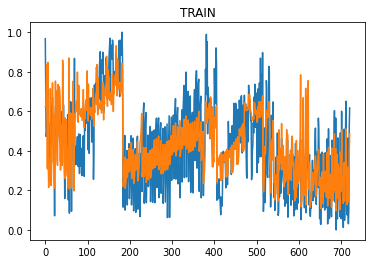

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
0.5381124875830006
y_ols_train = compare(ols_coef, x_train, ols_bias)

plt.plot(np.arange(len(y_train)), y_train)
plt.plot(np.arange(len(y_train)), y_ols_train)
plt.title('TRAIN')
plt.show()

print('R2 = ', r2_score(y_train, y_ols_train), '; SMSE = ', mean_squared_error(y_train, y_ols_train, squared=False),
      '; MAE = ', mean_absolute_error(y_train, y_ols_train))

pd.DataFrame(y_ols_train, columns=['y_ols_train'])

R2 =  0.603514026143545 ; SMSE =  0.10543249229909729 ; MAE =  0.08275532287308061


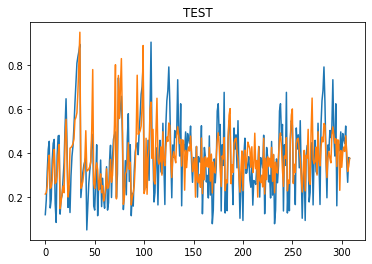

In [39]:

y_ols_test = reg.predict(x_test)

plt.plot(np.arange(len(y_ols_test)), y_test)
plt.plot(np.arange(len(y_ols_test)), y_ols_test)
plt.title('TEST')
plt.show()

print('R2 = ', r2_score(y_test, y_ols_test), '; SMSE = ',mean_squared_error(y_test, y_ols_test, squared=False),
      '; MAE = ',mean_absolute_error(y_test, y_ols_test))

pd.DataFrame(y_ols_train, columns=['y_ols_test'])

In [12]:
from sklearn.linear_model import Ridge

reg1 = Ridge(alpha=1).fit(x_train, y_train)
ridge_coef = reg1.coef_

ridge_bias = reg1.intercept_
print(reg1.intercept_)
ridge_coef

# ols_coef

0.14123973351544272


R2 =  0.5995356328872945 ; SMSE =  0.13968476686557366 ; MAE =  0.11290768188764178


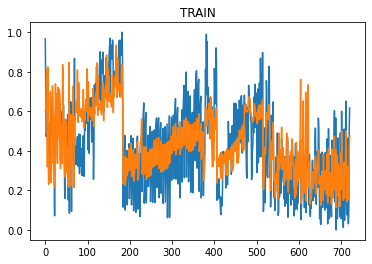

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_ridge_train = compare(ridge_coef, x_train, ridge_bias)

plt.plot(np.arange(len(y_train)), y_train)
plt.plot(np.arange(len(y_train)), y_ridge_train)
plt.title('TRAIN')
plt.show()

print('R2 = ', r2_score(y_train, y_ridge_train), '; SMSE = ', mean_squared_error(y_train, y_ridge_train, squared=False),
      '; MAE = ', mean_absolute_error(y_train, y_ridge_train))

pd.DataFrame(y_ridge_train, columns=['y_ridge_train'])

R2 =  0.5929882434806769 ; RMSE =  0.10682281927358038 ; MAE =  0.08367086658373997


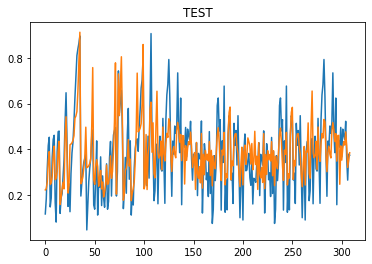

In [18]:
y_ridge_test = reg1.predict(x_test)

plt.plot(np.arange(len(y_ridge_test)), y_test)
plt.plot(np.arange(len(y_ridge_test)), y_ridge_test)
plt.title('TEST')
plt.show()

print('R2 = ', r2_score(y_test, y_ridge_test), '; RMSE = ',mean_squared_error(y_test, y_ridge_test, squared=False),
      '; MAE = ',mean_absolute_error(y_test, y_ridge_test))

pd.DataFrame(y_ridge_test, columns=['y_ridge_test'])

In [20]:
#lasso
from sklearn.linear_model import Lasso

reg2 = Lasso(alpha=0.0001).fit(x_train, y_train)
lasso_coef = reg2.coef_

lasso_bias = reg2.intercept_
print(reg2.intercept_)
lasso_coef

0.1404567754980049


R2 =  0.6010496617447125 ; SMSE =  0.13942046490111734 ; MAE =  0.11227641979351703


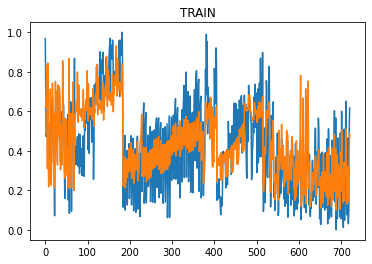

In [21]:
y_lasso_train = compare(lasso_coef, x_train, lasso_bias)

plt.plot(np.arange(len(y_train)), y_train)
plt.plot(np.arange(len(y_train)), y_lasso_train)
plt.title('TRAIN')
plt.show()

print('R2 = ', r2_score(y_train, y_lasso_train), '; SMSE = ', mean_squared_error(y_train, y_lasso_train, squared=False),
      '; MAE = ', mean_absolute_error(y_train, y_lasso_train))

pd.DataFrame(y_lasso_train, columns=['y_lasso_train'])

In [22]:
y_lasso_test = reg2.predict(x_test)

plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_lasso_test)
plt.title('TEST')
plt.show()

print('R2 = ', r2_score(y_test, y_lasso_test), '; RMSE = ',mean_squared_error(y_test, y_lasso_test, squared=False),
      '; MAE = ',mean_absolute_error(y_test, y_lasso_test))

pd.DataFrame(y_lasso_test, columns=['y_lasso_test'])

R2 =  0.6033251325238597 ; RMSE =  0.10545760435216471 ; MAE =  0.08268587518696419


,y_lasso_test
0,0.215042
1,0.221056
2,0.252629
3,0.345846
4,0.390951
...,...
304,0.477219
305,0.406540
306,0.315640
307,0.341815


In [ ]:
#ELASTIC

In [23]:
from sklearn.linear_model import ElasticNet

reg3 = ElasticNet(alpha=0.00001).fit(x_train, y_train)
elastic_coef = reg3.coef_

elastic_bias = reg3.intercept_
print(reg3.intercept_)
elastic_coef

0.13896223432596982


R2 =  0.601096557560546 ; SMSE =  0.13941227036163595 ; MAE =  0.11217983283621913


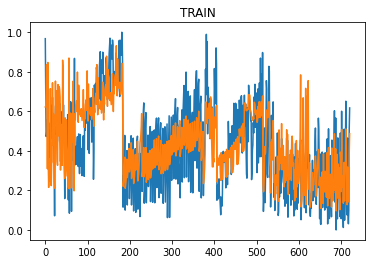

In [24]:
y_elastic_train = compare(elastic_coef, x_train, elastic_bias)

plt.plot(np.arange(len(y_train)), y_train)
plt.plot(np.arange(len(y_train)), y_elastic_train)
plt.title('TRAIN')
plt.show()

print('R2 = ', r2_score(y_train, y_elastic_train), '; SMSE = ', mean_squared_error(y_train, y_elastic_train, squared=False),
      '; MAE = ', mean_absolute_error(y_train, y_elastic_train))

pd.DataFrame(y_elastic_train, columns=['y_elastic_train'])

R2 =  0.6034771738523814 ; RMSE =  0.10543739201671619 ; MAE =  0.0827550426819337


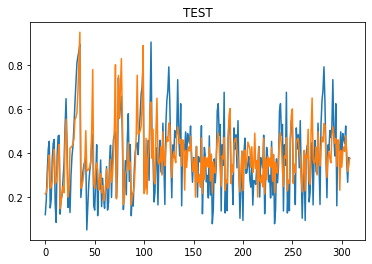

In [26]:
y_elastic_test = reg3.predict(x_test)

plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_elastic_test)
plt.title('TEST')
plt.show()

print('R2 = ', r2_score(y_test, y_elastic_test), '; RMSE = ',mean_squared_error(y_test, y_elastic_test, squared=False),
      '; MAE = ',mean_absolute_error(y_test, y_elastic_test))

pd.DataFrame(y_elastic_test, columns=['y_elastic_test'])

In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     271.2
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.78e-207
Time:                        16:11:27   Log-Likelihood:                 645.90
No. Observations:                1030   AIC:                            -1278.
Df Residuals:                    1023   BIC:                            -1243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1369      0.023      5.984      0.0

In [14]:
def compare(coef,df, b):
    y_pred = []
    for i in range(len(df)):
        y_pred.append(coef[0] * df['component1'][i] + coef[1] * df['component2'][i] +
                      coef[2] * df['component3'][i] + coef[3] * df['component4'][i] +
                      coef[4] * df['component5'][i] + coef[5] * df['age'][i] + b)
    return y_pred

# Sheet 3 Duplicate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# read data
path_to_datafile = "Concrete_Data.xls"
df = pd.read_excel(path_to_datafile)
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "component1",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "component2",
                   "Fly Ash (component 3)(kg in a m^3 mixture)": "component3",
                   "Water  (component 4)(kg in a m^3 mixture)": "component4",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)": "component5",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "component6",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)": "component7",
                   "Age (day)": "age",
                   "Concrete compressive strength(MPa, megapascals) ": "y", }, inplace=True)

df.head()

In [ ]:
# normalization
df_norm = df.copy(deep=True)
df_norm["component1"] = [(x - min(df_norm["component1"])) / (max(df_norm["component1"]) - min(df_norm["component1"]))
                         for x in df_norm["component1"]]
df_norm["component2"] = [(x - min(df_norm["component2"])) / (max(df_norm["component2"]) - min(df_norm["component2"]))
                         for x in df_norm["component2"]]

df_norm["component3"] = [(x - min(df_norm["component3"])) / (max(df_norm["component3"]) - min(df_norm["component3"]))
                         for x in df_norm["component3"]]

df_norm["component4"] = [(x - min(df_norm["component4"])) / (max(df_norm["component4"]) - min(df_norm["component4"]))
                         for x in df_norm["component4"]]

df_norm["component5"] = [(x - min(df_norm["component5"])) / (max(df_norm["component5"]) - min(df_norm["component5"]))
                         for x in df_norm["component5"]]

df_norm["component6"] = [(x - min(df_norm["component6"])) / (max(df_norm["component6"]) - min(df_norm["component6"]))
                         for x in df_norm["component6"]]

df_norm["component7"] = [(x - min(df_norm["component7"])) / (max(df_norm["component7"]) - min(df_norm["component7"]))
                         for x in df_norm["component7"]]

df_norm["age"] = [(x - min(df_norm["age"])) / (max(df_norm["age"]) - min(df_norm["age"]))
                  for x in df_norm["age"]]

df_norm["y"] = [(x - min(df_norm["y"])) / (max(df_norm["y"]) - min(df_norm["y"]))
                  for x in df_norm["y"]]

In [ ]:
x = df_norm.copy(deep=False)
y = df_norm['y']
del x['component6']
del x['component7']
del x['y']

x

In [ ]:
y

In [ ]:
x_train = x[:721]
x_test = x[721:]
y_train = y[:721]
y_test = y[721:]
y_test

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
ols_coef = reg.coef_
ols_coef
ols_bias = reg.intercept_
# print(reg.intercept_)
ols_coef

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_ols_train = compare(ols_coef, x_train, ols_bias)

plt.plot(np.arange(len(y_train)), y_train)
plt.plot(np.arange(len(y_train)), y_ols_train)
plt.title('TRAIN')
plt.show()

print('R2 = ', r2_score(y_train, y_ols_train), '; SMSE = ', mean_squared_error(y_train, y_ols_train, squared=False),
      '; MAE = ', mean_absolute_error(y_train, y_ols_train))

pd.DataFrame(y_ols_train, columns=['y_ols_train'])

In [ ]:

y_ols_test = reg.predict(x_test)

plt.plot(np.arange(len(y_ols_test)), y_test)
plt.plot(np.arange(len(y_ols_test)), y_ols_test)
plt.title('TEST')
plt.show()

print('R2 = ', r2_score(y_test, y_ols_test), '; SMSE = ',mean_squared_error(y_test, y_ols_test, squared=False),
      '; MAE = ',mean_absolute_error(y_test, y_ols_test))

pd.DataFrame(y_ols_train, columns=['y_ols_test'])

In [ ]:
def compare(coef,df, b):
    y_pred = []
    for i in range(len(df)):
        y_pred.append(coef[0] * df['component1'][i] + coef[1] * df['component2'][i] +
                      coef[2] * df['component3'][i] + coef[3] * df['component4'][i] +
                      coef[4] * df['component5'][i] + coef[5] * df['age'][i] + b)
    return y_pred